### Model to classify people as Happy / Sad

In [1]:
import tensorflow as tf

In [2]:
import os

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [4]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
import cv2
import imghdr

In [7]:
data_dir = 'data'

In [8]:
os.listdir('data')

['happy', 'sad']

In [9]:
image_exts = ['jpeg','jpg','bmp','png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 147 files belonging to 2 classes.


2025-07-10 04:06:07.320435: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-07-10 04:06:07.320477: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-07-10 04:06:07.320482: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-07-10 04:06:07.320506: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-10 04:06:07.320519: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

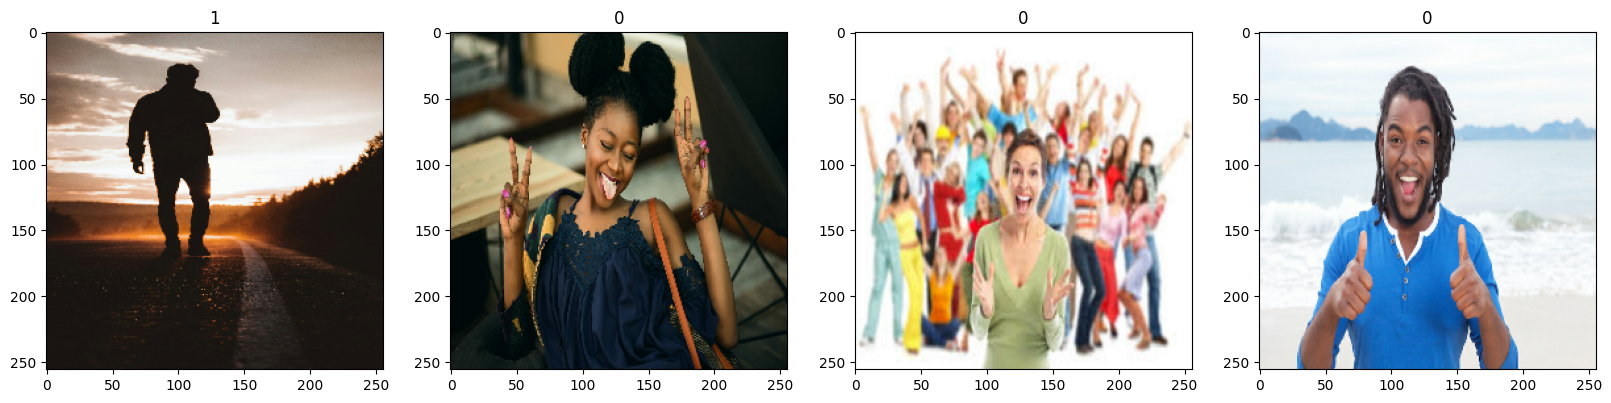

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
data = data.map(lambda x, y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.3882353 , 0.5686275 , 0.77254903],
          [0.3882353 , 0.5686275 , 0.77254903],
          [0.3882353 , 0.5686275 , 0.77254903],
          ...,
          [0.34117648, 0.5372549 , 0.7372549 ],
          [0.34117648, 0.5372549 , 0.7372549 ],
          [0.34117648, 0.5372549 , 0.7372549 ]],
 
         [[0.3882353 , 0.5686275 , 0.77254903],
          [0.3882353 , 0.5686275 , 0.77254903],
          [0.3882353 , 0.5686275 , 0.77254903],
          ...,
          [0.34117648, 0.5372549 , 0.7372549 ],
          [0.34117648, 0.5372549 , 0.7372549 ],
          [0.34117648, 0.5372549 , 0.7372549 ]],
 
         [[0.3882353 , 0.5686275 , 0.77254903],
          [0.3882353 , 0.5686275 , 0.77254903],
          [0.3882353 , 0.5686275 , 0.77254903],
          ...,
          [0.34117648, 0.5372549 , 0.7372549 ],
          [0.34117648, 0.5372549 , 0.7372549 ],
          [0.34117648, 0.5372549 , 0.7372549 ]],
 
         ...,
 
         [[0.10171951, 0.27059206, 0.41752833],
          [0.12523

In [18]:
len(data)

5

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [20]:
train_size + val_size + test_size

5

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [22]:
len(train)

3

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

In [25]:
model.add(Input(shape=(256, 256, 3)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,204,529 (16.04 MB)

 Trainable params: 4,204,529 (16.04 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
logdir = 'logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30


2025-07-10 04:07:00.045604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 338ms/step - accuracy: 0.4531 - loss: 2.5625 - val_accuracy: 0.5625 - val_loss: 0.9953
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 315ms/step - accuracy: 0.5273 - loss: 0.9707 - val_accuracy: 0.5000 - val_loss: 0.9666
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 386ms/step - accuracy: 0.5013 - loss: 0.7926 - val_accuracy: 0.5625 - val_loss: 0.6789
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step - accuracy: 0.4648 - loss: 0.6926 - val_accuracy: 0.5938 - val_loss: 0.6739
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 342ms/step - accuracy: 0.4570 - loss: 0.6868 - val_accuracy: 0.5625 - val_loss: 0.6761
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 378ms/step - accuracy: 0.5534 - loss: 0.6891 - val_accuracy: 0.5938 - val_loss: 0.6692
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 334ms/step - accuracy: 0.5898 - loss: 0.6773 - val_accuracy: 0.5312 - val_loss: 0.6638
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 476ms/step - accuracy: 0.4857 - loss: 0.6707 - val_accuracy: 0.4688 - val_loss: 0.6533
Epo

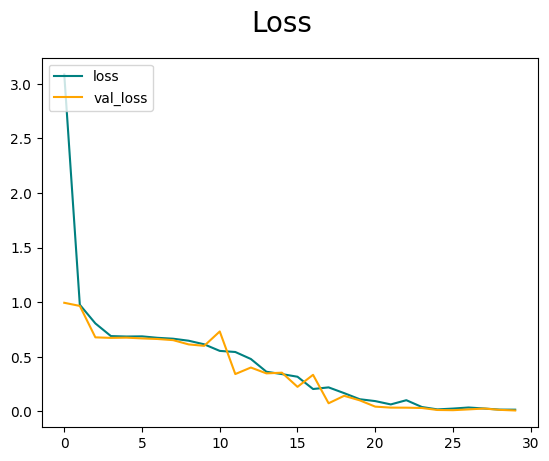

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

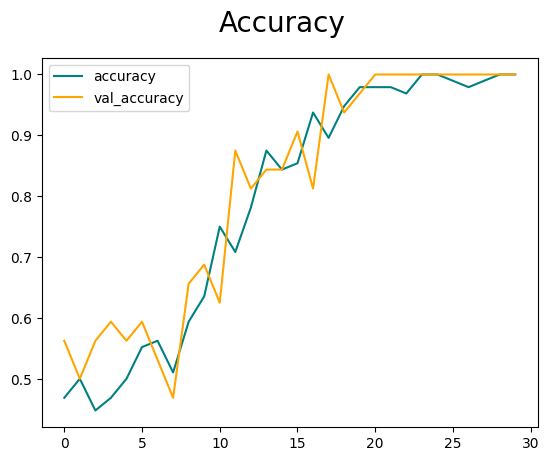

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


2025-07-10 04:07:41.520907: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


In [37]:
import cv2

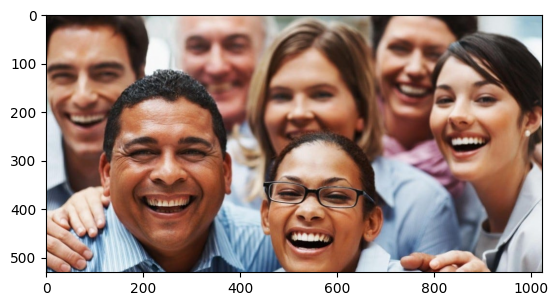

In [38]:
img = cv2.imread('happyppl.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

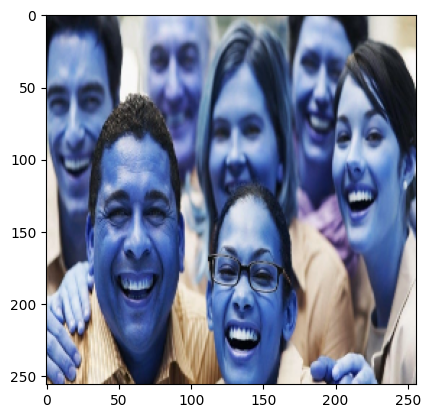

In [39]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [41]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [42]:
yhat

array([[0.37287456]], dtype=float32)

In [43]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


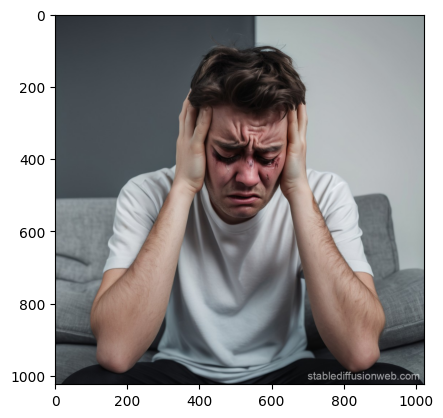

In [44]:
img2 = cv2.imread('sadppl.jpg')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

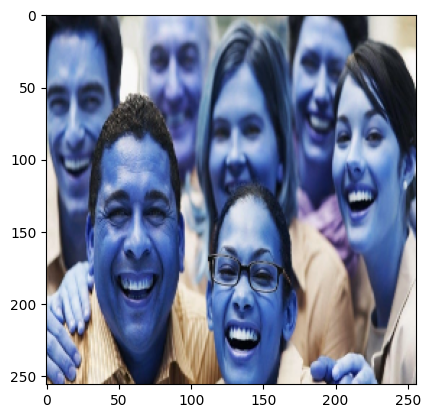

In [45]:
resize2 = tf.image.resize(img2, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [46]:
np.expand_dims(resize2, 0).shape

(1, 256, 256, 3)

In [47]:
yhat2 = model.predict(np.expand_dims(resize2/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [48]:
yhat2

array([[0.99255556]], dtype=float32)

In [49]:
if yhat2 > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [50]:
from tensorflow.keras.models import load_model

In [51]:
model.save(os.path.join('models','happysadclassifiermodel.h5'))

In [52]:
new_model = load_model(os.path.join('models','happysadclassifiermodel.h5'))

In [53]:
new_model

<Sequential name=sequential, built=True>

In [54]:
yhat_new = new_model.predict(np.expand_dims(resize2/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [55]:
yhat_new

array([[0.99255556]], dtype=float32)

In [56]:
if yhat_new > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
